In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.cloud import bigquery as bq

# Initialize a BigQuery Client
client = bq.Client.from_service_account_json('/Users/jharding/repos/SMU-DS-6372/ml-jth-d220ef33563e.json')
from bq_helper import BigQueryHelper

# BigQuery Data Load (Do Not Run)
## Functions
### Extract .txt File Function

In [2]:
### Extract data file from zip files

def extract_txt(path, storage_path, f):
    # Now change the directory
    os.chdir( path )
    import zipfile
    zipfile.ZipFile
    #print(f)
    my_zip = zipfile.ZipFile(f) # Specify your zip file's name here
    storage_path = storage_path
    for file in my_zip.namelist():
        #if my_zip.getinfo(file).filename.endswith('.txt'):
        if my_zip.getinfo(file).filename.startswith('produkt'):
            print("unzipping:", file)
            my_zip.extract(file, storage_path)
        

### BigQuery Load Procedure

In [17]:
def load_bq(dataset, table, data):
    client = bq.Client.from_service_account_json('/Users/jharding/repos/SMU-DS-6372/ml-jth-d220ef33563e.json')
    dataset_id = dataset
    
    dataset_ref = client.dataset(dataset_id)
    table_ref = table
    
    job_config=bq.LoadJobConfig()
    job_config.schema = [
        bq.SchemaField('StationID', 'INTEGER'),
        bq.SchemaField('Date', 'DATE'),
        bq.SchemaField('QN3',  'INTEGER'),
        bq.SchemaField('MaxWindGust', 'FLOAT64'),
        bq.SchemaField('MeanWindSpeed', 'FLOAT64'),
        bq.SchemaField('QN4', 'INT64'),
        bq.SchemaField('PrecipHeight', 'FLOAT64'),
        bq.SchemaField('PrecipForm', 'INT64'),
        bq.SchemaField('SunDuration', 'FLOAT64'),
        bq.SchemaField('SnowDepth', 'INT64'),
        bq.SchemaField('MeanCloudCover', 'FLOAT64'),
        bq.SchemaField('MeanCloudVapor', 'FLOAT64'),
        bq.SchemaField('MeanPressure', 'FLOAT64'),
        bq.SchemaField('MeanTemp', 'FLOAT64'),
        bq.SchemaField('MeanRelHumid', 'FLOAT64'),
        bq.SchemaField('MaxTemp', 'FLOAT64'),
        bq.SchemaField('MinTemp', 'FLOAT64'),
        bq.SchemaField('MinAirTemp', 'FLOAT64')  
    ]
    
    uri = data
                       
    load_job = client.load_table_from_dataframe(
        uri,
        dataset_ref.table(table_ref),
        job_config=job_config)
    
    print('Starting job{}',format(load_job.job_id))
    
    load_job.result()
    print('Job Finished\n')
    

### Panda Dataframe Function

In [4]:
def extract_data(file):
    test = pd.read_csv(file,sep=';')
    test.columns = ['StationID','DateTime','QN3','MaxWindGust',
                'MeanWindSpeed','QN4','PrecipHeight','PrecipForm',
                'SunDuration', 'SnowDepth', 'MeanCloudCover',
                'MeanCloudVapor', 'MeanPressure','MeanTemp',
                'MeanRelHumid','MaxTemp','MinTemp','MinAirTemp','eor']

    ## Change to Date Format
    dateFormat = '%Y%m%d'
    test['DateTime'] = pd.to_datetime(test['DateTime'], format=dateFormat)
    test['Date']=test['DateTime'].dt.date
    
    ## Drop unneeded columns
    test.drop(['eor','DateTime'], axis=1, inplace=True)
    
    ## Force dataframe to Float64
    test['MaxWindGust'] = test['MaxWindGust'].astype(np.float64)
    test['MeanPressure'] = test['MeanPressure'].astype(np.float64)
    test['MeanWindSpeed'] = test['MeanWindSpeed'].astype(np.float64)
    test['MinAirTemp'] = test['MinAirTemp'].astype(np.float64)
    test['PrecipHeight'] = test['PrecipHeight'].astype(np.float64)
    test['SunDuration'] = test['SunDuration'].astype(np.float64)
    test['MeanCloudCover'] = test['MeanCloudCover'].astype(np.float64)
    test['MeanCloudVapor'] = test['MeanCloudVapor'].astype(np.float64)
    test['MeanTemp'] = test['MeanTemp'].astype(np.float64)
    test['MeanRelHumid'] = test['MeanRelHumid'].astype(np.float64)
    test['MaxTemp'] = test['MaxTemp'].astype(np.float64)
    test['MinTemp'] = test['MinTemp'].astype(np.float64)
    
    print("Preparing to load:",file)
    load_bq('germany', 'weather', test)


### Get ZipFile List Function

In [5]:
### Get all of the zip files and put them in a list

from __future__ import print_function
import os

def get_file(path, ext):
    z=[]   
    files = os.listdir(path)
    for name in files:
        if name.endswith(ext):
            z.append(name)
    return z
            



## Extract Text Files

In [ ]:
## Set Path
storage_path = '/Users/jharding/repos/SMU-DS-6372/project/DS6372/data/dest/'
path = '/Users/jharding/repos/SMU-DS-6372/project/DS6372/data/zip/'

## Get list of zip files.
z = get_file(path, '.zip')

## For each zip file, extract text file.
path = '/Users/jharding/repos/SMU-DS-6372/project/DS6372/data/zip/'
for file in z:
    extract_txt(path, storage_path, file)
    



### Get and Sort Text File List

In [21]:
#### Load txt files
path = '/Users/jharding/repos/SMU-DS-6372/project/DS6372/data/dest'
os.chdir( path )
t = get_file(path, '.txt')
t.sort()
t

## Load Data into BQ

In [ ]:
for file in t:
    extract_data(file)

# Weather Stations

In [2]:
stations = pd.read_csv("./data/WeatherStationsGermany.csv")
stations.head()

,StationID,FromDate,ToDate,Stations,Latitude,Longitude,StationName,State
0,1,19370101,19860630,478,47.8413,8.8493,Aach,Baden-Wrttemberg
1,3,18910101,20110331,202,50.7827,6.0941,Aachen,Nordrhein-Westfalen
2,44,19710301,20190202,44,52.9336,8.2370,Groﬂenkneten,Niedersachsen
3,52,19730101,20011231,46,53.6623,10.1990,Ahrensburg-Wulfsdorf,Schleswig-Holstein
4,61,19750701,19780831,339,48.8443,12.6171,Aiterhofen,Bayern


In [3]:
import geopandas as gpd
from shapely.geometry import Point
#Creating a GeoDataFrame from a DataFrame with coordinates


## A GeoDataFrame needs a shapely object, so we create a new column Coordinates 
## as a tuple of Longitude and Latitude :
stations['Coordinates'] = list(zip(stations.Longitude, stations.Latitude))

## Then, we transform tuples to Point :
stations['Coordinates'] = stations['Coordinates'].apply(Point)

# Now, we can create the GeoDataFrame by setting geometry with the coordinates created previously.
gdf = gpd.GeoDataFrame(stations, geometry='Coordinates')
print(gdf.head())

   StationID  FromDate    ToDate  Stations  Latitude  Longitude  \
0          1  19370101  19860630       478   47.8413     8.8493   
1          3  18910101  20110331       202   50.7827     6.0941   
2         44  19710301  20190202        44   52.9336     8.2370   
3         52  19730101  20011231        46   53.6623    10.1990   
4         61  19750701  19780831       339   48.8443    12.6171   

            StationName                State  \
0                  Aach     Baden-Wrttemberg   
1                Aachen  Nordrhein-Westfalen   
2          Groﬂenkneten        Niedersachsen   
3  Ahrensburg-Wulfsdorf   Schleswig-Holstein   
4            Aiterhofen               Bayern   

                         Coordinates  
0  POINT (8.849299999999999 47.8413)  
1             POINT (6.0941 50.7827)  
2              POINT (8.237 52.9336)  
3             POINT (10.199 53.6623)  
4            POINT (12.6171 48.8443)  


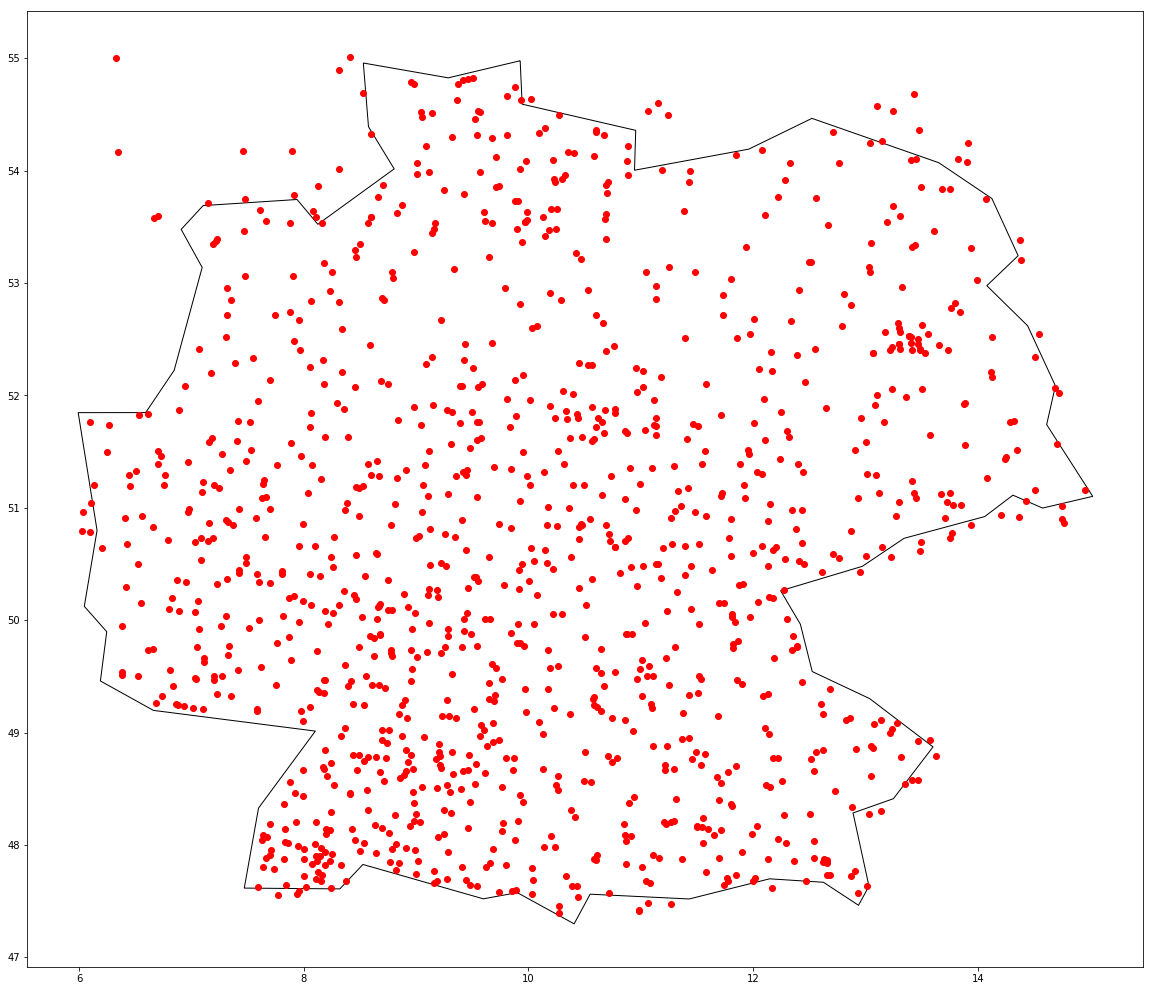

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world[world['name'] == 'Germany'].plot(color='white', edgecolor='black', figsize=(20,20))
gdf.plot(ax=base, color='red')
plt.show()

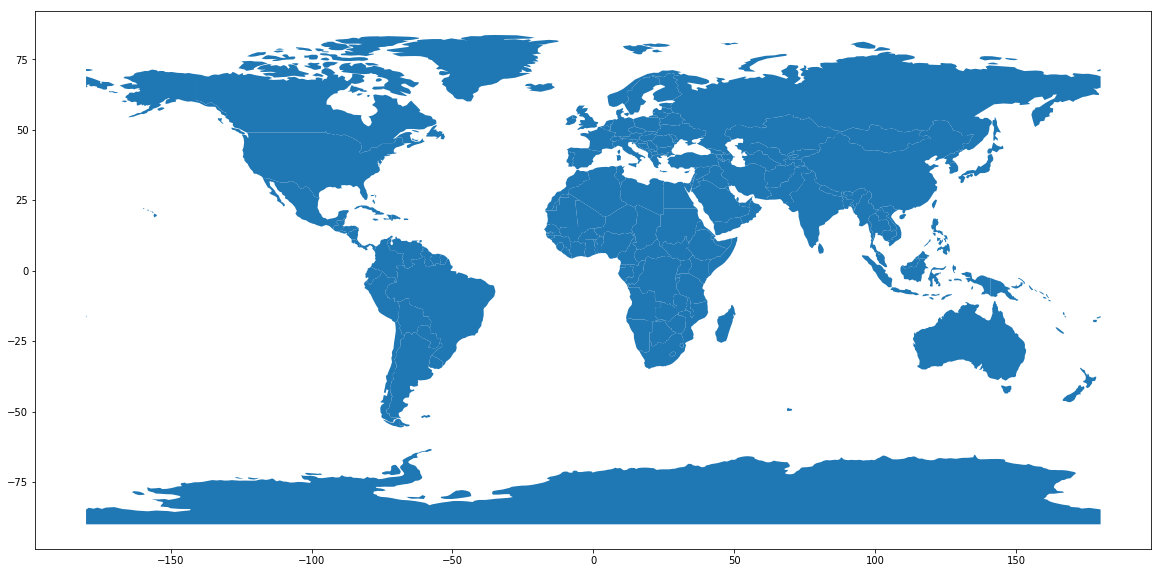

In [6]:
world.plot(figsize=(20,20))

# Weather EDA

In [7]:
## Calculat the percentage of null values.  
## Null values set to -999.0
def pct_null(x):
    print(x,":", ((df[df[x]== -999][x].count())/df[x].count())*100, "Pct Null")

def plot_hist(x):
    df[df[x]> -999][x].hist(bins=30)


In [8]:
## Define the query'
## MaxWindGust: All values are -999.0.  Remove from query
## MeanWindSpeed: All values are -999.0.  Remove from query

### This will be our Test Data
QUERY = """
        SELECT StationID, Date, MinTemp, MaxTemp, MeanTemp,
        MinAirTemp, SunDuration, MeanCloudCover, MeanCloudVapor, 
        MeanRelHumid, PrecipHeight, PrecipForm, MeanPressure, 
        SnowDepth
        FROM `ml-jth.germany.weather`
        WHERE date > "1939-09-01" and date < "1945-06-01"
        order by StationID, Date
        """
query_job = client.query(QUERY)
df = query_job.to_dataframe()


### Training Data 
QUERY2 = """
        SELECT StationID, Date, MinTemp, MaxTemp, MeanTemp,
        MinAirTemp, SunDuration, MeanCloudCover, MeanCloudVapor, 
        MeanRelHumid, PrecipHeight, PrecipForm, MeanPressure, 
        SnowDepth
        FROM `ml-jth.germany.weather`
        WHERE date > "1929-09-01" and date < "1939-09-01"
        order by StationID, Date
        """

In [9]:
## Convert Temps to Farenheit
## Replace w/BQ Function
df['MaxTemp'] = df['MaxTemp'].apply(lambda x: int((x * 9/5) + 32))
df['MinTemp'] = df['MinTemp'].apply(lambda x: int((x * 9/5) + 32))
df['MeanTemp'] = df['MeanTemp'].apply(lambda x: int((x * 9/5) + 32))
df['MinAirTemp'] = df['MinAirTemp'].apply(lambda x: int((x * 9/5) + 32))
df.loc[df['MaxTemp']<=-999.0, ['MaxTemp']]= -999.0
df.loc[df['MinTemp']<=-999.0, ['MinTemp']]= -999.0
df.loc[df['MeanTemp']<=-999.0, ['MeanTemp']]= -999.0
df.loc[df['MinAirTemp']<=-999.0, ['MinAirTemp']]= -999.0

df.head(3)

,StationID,Date,MinTemp,MaxTemp,MeanTemp,MinAirTemp,SunDuration,MeanCloudCover,MeanCloudVapor,MeanRelHumid,PrecipHeight,PrecipForm,MeanPressure,SnowDepth
0,1,1940-01-01,20.0,36.0,26.0,-999.0,-999.0,2.3,-999.0,-999.0,0.0,0,-999.0,6
1,1,1940-01-02,8.0,25.0,13.0,-999.0,-999.0,0.0,-999.0,-999.0,0.0,0,-999.0,6
2,1,1940-01-03,6.0,19.0,16.0,-999.0,-999.0,8.0,-999.0,-999.0,2.0,7,-999.0,6


In [10]:
## Get the number of columns and rows
df.shape

(224658, 14)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
features = ['MinTemp','MaxTemp','MeanTemp','MinAirTemp','SunDuration',
            'MeanCloudCover','MeanCloudVapor','MeanRelHumid','PrecipHeight','PrecipForm','MeanPressure','SnowDepth']

x = df.loc[:, features].values

In [11]:
### How many null columns
df.isnull().sum()

StationID         0
Date              0
MinTemp           0
MaxTemp           0
MeanTemp          0
MinAirTemp        0
SunDuration       0
MeanCloudCover    0
MeanCloudVapor    0
MeanRelHumid      0
PrecipHeight      0
PrecipForm        0
MeanPressure      0
SnowDepth         0
dtype: int64

In [51]:
### Are there particular stations that can be ommitted
stations = df.groupby('StationID')

In [12]:
## Iterate over list to get pct of nulls
## Nulls determined by value = -999.0
### Remove MaxWindGust
### Remove MeanWindSpeed

col = iter(list(['MinTemp', 'MaxTemp', 'MeanTemp', 'MinAirTemp',
                 'SunDuration', 'MeanCloudVapor','MeanCloudCover',
                 'MeanRelHumid', 'PrecipHeight', 'PrecipForm', 
                 'MeanPressure', 'SnowDepth'
                ]))

for i in col:
    pct_null(i)

MinTemp : 1.6344844163127954 Pct Null
MaxTemp : 1.7074842649716457 Pct Null
MeanTemp : 2.051562819930739 Pct Null
MinAirTemp : 53.7715104736978 Pct Null
SunDuration : 48.79772810227101 Pct Null
MeanCloudVapor : 10.363307783386302 Pct Null
MeanCloudCover : 3.140773976444195 Pct Null
MeanRelHumid : 9.699187209002128 Pct Null
PrecipHeight : 1.5694967461652825 Pct Null
PrecipForm : 1.7502158836987778 Pct Null
MeanPressure : 35.7076088988596 Pct Null
SnowDepth : 3.7510349063910478 Pct Null


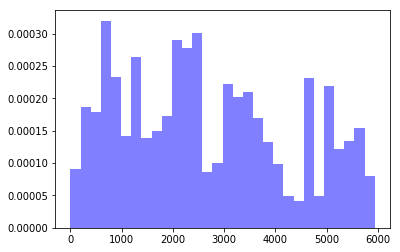

In [53]:
# What is the distribution of WeatherStations
num_bins = 30
plt.hist(df['StationID'], num_bins, density=1, facecolor='blue', alpha=0.5)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12dd529b0>,
      dtype=object)

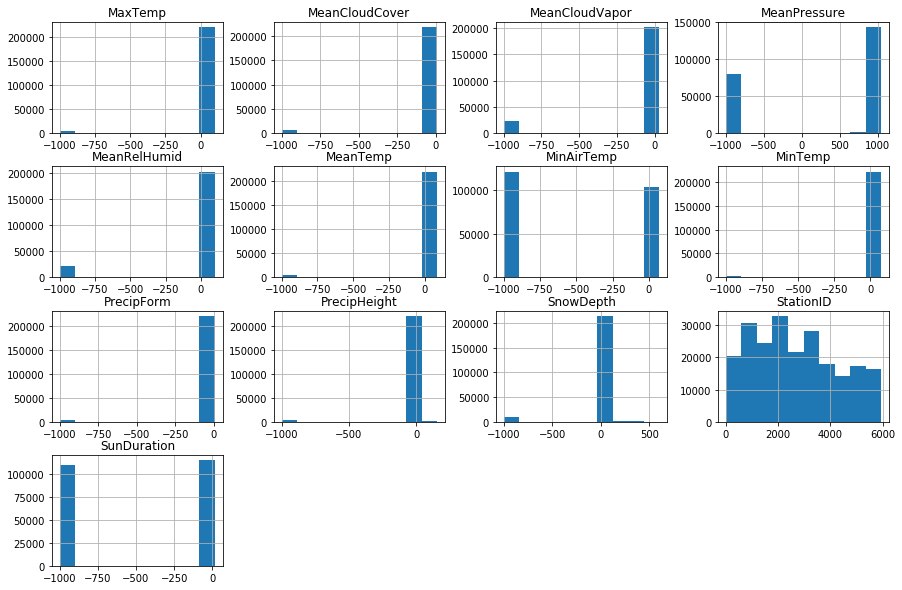

In [54]:
#pd.options.display.mpl_style = 'default'
df.hist(figsize=(15,10))

## Closer Look at Variables 
### MaxTemp

MaxTemp : 1.7074842649716457 Pct Null


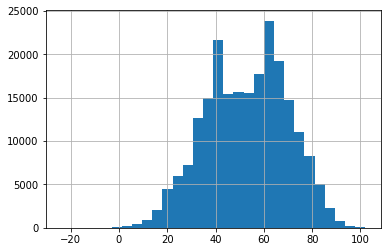

In [55]:
x = 'MaxTemp'
pct_null(x)
plot_hist(x)

### MinTemp

MinTemp : 1.6344844163127954 Pct Null


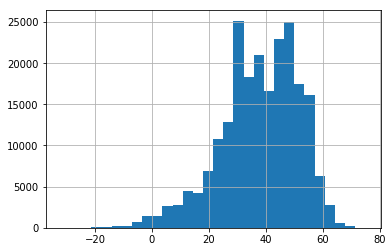

In [56]:
# Daily MinTemp - %
x = 'MinTemp'
pct_null(x)
plot_hist(x)

### MeanTemp

MeanTemp : 2.051562819930739 Pct Null


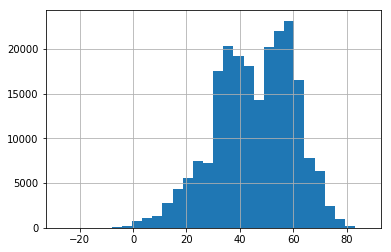

In [57]:
# Daily MeanTemp - %F
x = 'MeanTemp'
pct_null(x)
plot_hist(x)

### TempCategories

In [58]:
def get_stats(group):
    return {'a_min': group.min(), 'b_max': group.max(), 'd_count': group.count(), 'c_mean': group.mean()}

bins = [0, 32, 45,60, 74, 120]
group_names = ['Freezing','Cold','Mild','Warm','Hot']

#### MaxTemp Categories

In [59]:
df['MaxTempCat'] = pd.cut(df['MaxTemp'], bins, labels=group_names)
df['MaxTemp'].groupby(df['MaxTempCat']).apply(get_stats).unstack()

,a_min,b_max,c_mean,d_count
MaxTempCat,,,,
Freezing,1.0,32.0,24.801811,27161.0
Cold,33.0,45.0,39.201558,51608.0
Mild,46.0,60.0,53.332805,61225.0
Warm,61.0,74.0,66.922817,59093.0
Hot,75.0,102.0,80.236603,21665.0


#### MinTemp Category

In [60]:
df['MinTempCat'] = pd.cut(df['MinTemp'], bins, labels=group_names)
df['MinTemp'].groupby(df['MinTempCat']).apply(get_stats).unstack()

,a_min,b_max,c_mean,d_count
MinTempCat,,,,
Freezing,1.0,32.0,23.573482,71031.0
Cold,33.0,45.0,38.929809,72488.0
Mild,46.0,60.0,51.633197,71120.0
Warm,61.0,74.0,63.077096,3567.0
Hot,75.0,75.0,75.000000,1.0


#### MeanTemp Cateogory

In [61]:
df['MeanTempCat'] = pd.cut(df['MeanTemp'], bins, labels=group_names)
df['MeanTemp'].groupby(df['MeanTempCat']).apply(get_stats).unstack()

,a_min,b_max,c_mean,d_count
MeanTempCat,,,,
Freezing,1.0,32.0,23.677939,42464.0
Cold,33.0,45.0,38.774704,63179.0
Mild,46.0,60.0,53.330077,79651.0
Warm,61.0,74.0,65.195814,32633.0
Hot,75.0,87.0,77.053866,1578.0


###  MaxCloudCover

MeanCloudCover : 3.140773976444195 Pct Null


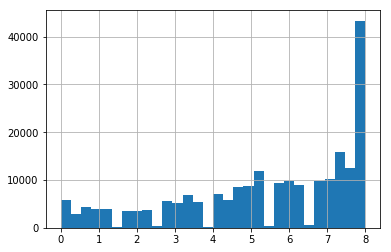

In [62]:
x = 'MeanCloudCover'
pct_null(x)
plot_hist(x)

### PrecipHeight

PrecipHeight : 1.5694967461652825 Pct Null


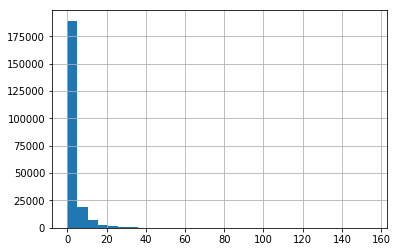

In [63]:
x = 'PrecipHeight'
pct_null(x)
plot_hist(x)

### PrecipForm

PrecipForm : 1.7502158836987778 Pct Null


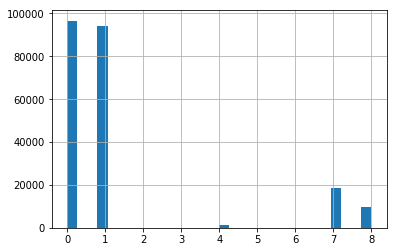

In [64]:
# 0 - no precipitation 
# 1 - only rain (before 1979)
# 4 - unknown form of recorded precipitation
# 6 - only rain; only liquid precipitation at automatic stations
# 7 - only snow; only solid precipitation at automatic stations
# 8 - rain and snow (and/or "Schneeregen"); liquid and solid precipitation at automatic stations
# 9 - error or missing value or no automatic determination of precipitation form
x='PrecipForm'
pct_null(x)
plot_hist(x)

### SunDuration

SunDuration : 48.79772810227101 Pct Null


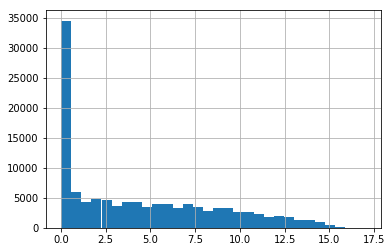

In [65]:
# Daily Sun duration - Hours
x = 'SunDuration'
pct_null(x)
plot_hist(x)

In [ ]:
SunDuration_Null = df[df.SunDuration == -999].groupby(['StationID'])['SunDuration'].count()
print(SunDuration_Null)

In [ ]:
#df[df.StationID == 314].groupby(['StationID'])['MaxTemp'].count()
col = list(SunDuration_Null.index)
col = iter(list(SunDuration_Null.index))

for i in col:
    temp = df[df.StationID == i].groupby(['StationID'])['SunDuration'].count()
    print(i,temp.values)
#MaxTemp_Null.index

In [68]:
#stations.agg({'SunDuration':[min,max,"std","mean","count"]})

### SnowDepth

SnowDepth : 3.7510349063910478 Pct Null


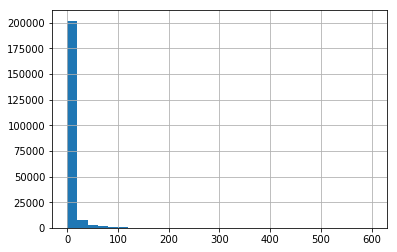

In [69]:
# Daily SnowDepth - cm
x = 'SnowDepth'
pct_null(x)
plot_hist(x)

In [13]:
df['SnowDepth'].describe()

count    224658.000000
mean        -33.021344
std         191.983536
min        -999.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         600.000000
Name: SnowDepth, dtype: float64

### MeanCloudCover

MeanCloudCover : 3.140773976444195 Pct Null


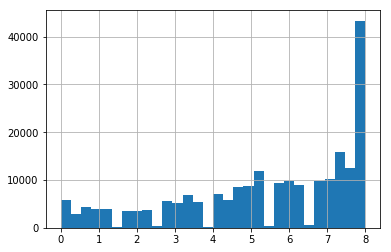

In [70]:
# Daily MeanCloudCover - 1/8
x = 'MeanCloudCover'
pct_null(x)
plot_hist(x)

### MeanCloudVapor

MeanCloudVapor : 10.363307783386302 Pct Null


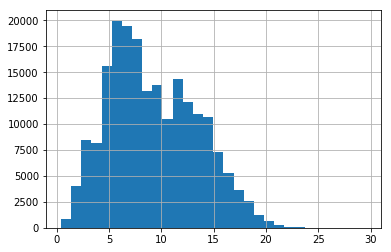

In [71]:
# Daily MeanCloudVapor - hPA
x = 'MeanCloudVapor'
pct_null(x)
plot_hist(x)

### MeanPressure

MeanPressure : 35.7076088988596 Pct Null


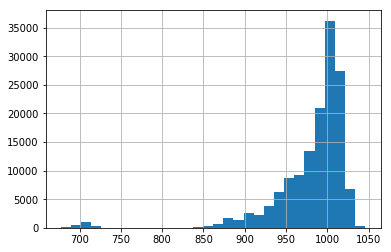

In [72]:
# Daily MeanPressure - hPA
x = 'MeanPressure'
pct_null(x)
plot_hist(x)

### MeanRelHumid

MeanRelHumid : 9.699187209002128 Pct Null


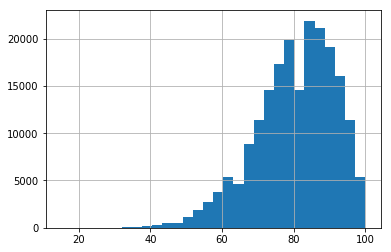

In [73]:
# Daily MeanRelHumid - %
x = 'MeanRelHumid'
pct_null(x)
plot_hist(x)

### [Scatter Plots](https://machinelearningmastery.com/quick-and-dirty-data-analysis-with-pandas/)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119802a90>,
      dtype=object)

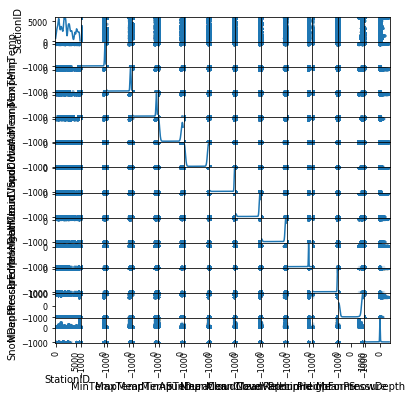

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [15]:
import pandas as pd 
df = pd.DataFrame(data={'A': [1, 2, 3], 'B': ['x', 'y', 'z']})
df


,A,B
0,1,x
1,2,y
2,3,z


In [16]:
df.at[1, 'B'] = ['m', 'n']
df

,A,B
0,1,x
1,2,"[m, n]"
2,3,z


In [21]:
df['C']=''
df

,A,B,C
0,1,x,
1,2,"[m, n]",
2,3,z,


In [22]:
index = 0
df.at[index, 'C'] = ['z', 'x']
df

,A,B,C
0,1,x,"[z, x]"
1,2,"[m, n]",
2,3,z,


In [46]:
#df.loc[df['MaxTemp']==-999.0, ['MaxTemp']]= -100
#df.loc[df['MaxTemp']==-999.0, ['MaxTemp']]= -100
#df.loc[df['MaxWindGust']==-100.0, ['MaxWindGust']]= -1
#df.loc[df['MinAirTemp']==-999.0, ['MaxWindGust']]= -100
#df.loc[df['MeanCloudCover']==-999.0, ['MeanCloudCover']]= -1
#df.loc[df['MeanCloudVapor']==-50.0, ['MeanCloudVapor']]= -10
